In [24]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import collections
from sklearn.decomposition import PCA
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler

In [2]:
# read in data
data = pd.read_csv('NewYork.csv')

# data cleansing

(-1.1019296620684242,
 1.1089713385687547,
 -1.1215025656294224,
 1.1010239316966393)

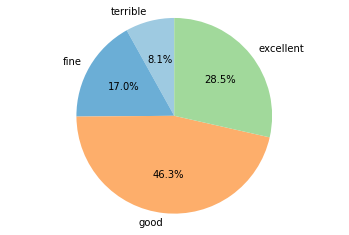

In [3]:
# pie
tmp  = data['review_scores_rating']
not_nan = tmp[tmp>0]
labels = 'terrible','fine','good','excellent'
terrible = len(tmp[tmp<=80])  # rate<=80
fine = len(tmp[tmp<=90])-terrible # 80 < rate <= 90
good = len(tmp[tmp<100]) - terrible - fine # 95 < rate < 100
excellent = len(tmp[tmp==100]) # rate = 100
sizes = [terrible, fine, good, excellent]
cmap = plt.get_cmap("tab20c")
colors = cmap(np.array([2, 1,6,10]))
fig1, ax1 = plt.subplots()
ax1.pie(sizes,  labels=labels, autopct = '%1.1f%%',shadow=False, startangle = 90,colors = colors)
ax1.axis('equal')

In [48]:
data.keys()

,id,host_response_time,host_response_rate,host_is_superhost,host_has_profile_pic,neighbourhood_cleansed,latitude,longitude,is_location_exact,property_type,...,maximum_nights,calendar_updated,availability_30,number_of_reviews,review_scores_rating,instant_bookable,is_business_travel_ready,cancellation_policy,require_guest_profile_picture,reviews_per_month
0,18461891,NaN,NaN,f,t,Ditmars Steinway,40.774142,-73.916246,t,Apartment,...,6,5 months ago,0,0,NaN,f,f,strict,f,NaN
1,20702398,within an hour,100%,f,t,City Island,40.849191,-73.786509,f,House,...,21,2 weeks ago,19,2,100.0,f,f,moderate,f,2.00
2,6627449,within an hour,100%,f,t,City Island,40.849775,-73.786609,t,Apartment,...,21,2 weeks ago,28,21,95.0,f,f,strict,f,0.77
3,19949243,within a few hours,100%,f,t,City Island,40.848838,-73.782276,f,Boat,...,1125,6 days ago,30,0,NaN,t,f,strict,f,NaN
4,1886820,NaN,NaN,f,t,City Island,40.841144,-73.783052,t,House,...,90,16 months ago,30,0,NaN,f,f,strict,f,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
44312,20530309,within an hour,90%,f,t,Flatlands,40.618675,-73.932736,f,Apartment,...,1125,2 weeks ago,30,1,100.0,t,f,flexible,f,0.81
44313,20459907,within a few hours,100%,f,t,Bushwick,40.684681,-73.905174,t,Apartment,...,30,2 weeks ago,4,0,NaN,t,f,strict,f,NaN
44314,4287386,within an hour,100%,f,t,Rockaway Beach,40.583865,-73.819245,f,Apartment,...,60,2 weeks ago,1,6,87.0,f,f,moderate,f,3.91
44315,20939747,within an hour,100%,f,t,Rosedale,40.679998,-73.720787,f,Apartment,...,1125,a week ago,7,0,NaN,f,f,strict,f,NaN


21837 21837


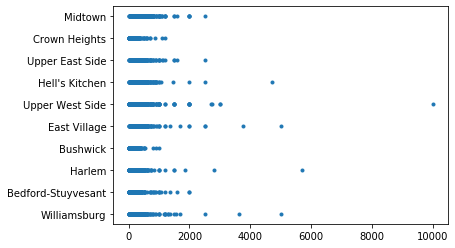

In [5]:
regions = collections.Counter(data['neighbourhood_cleansed'])
sort_r = sorted(regions.items(), key = lambda x: x[1],reverse = True)[:10]
x_plt = []
y_plt = []
for i in range(len(sort_r)):
    price = data['price']
    regs = data['neighbourhood_cleansed']
    idxs = [regs==sort_r[i]]
    s= list(price[regs == sort_r[i][0]])
    x_plt += s
    y_plt += [sort_r[i][0]]*len(s)

print(len(x_plt),len(y_plt))
plt.plot(x_plt,y_plt,".")

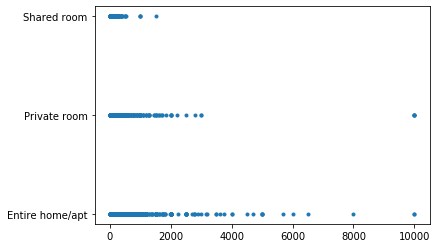

In [16]:
beds = data['room_type']
price = data['price']
plt.plot(price,beds,".")

# PCA using one HOT encoding

In [49]:
new_data = data[['price',
           'room_type',
           'accommodates',
           'review_scores_rating',
           'neighbourhood_cleansed']]
new_data = new_data[tmp>0]

In [50]:
lb_nh = LabelEncoder()
lb_rt = LabelEncoder()

In [51]:
oh_neighborhood = pd.get_dummies(new_data.neighbourhood_cleansed).astype(int)
oh_room_type = pd.get_dummies(new_data.room_type).astype(int)

In [52]:
le_neighborhood = lb_nh.fit_transform(new_data["neighbourhood_cleansed"])
le_room_type = lb_rt.fit_transform(new_data['room_type'])

In [53]:
new_data = new_data.drop(['room_type','neighbourhood_cleansed'], axis = 1)
le_data = pd.DataFrame(new_data)

In [54]:
le_neighborhood = pd.DataFrame(le_neighborhood)
le_room_type = pd.DataFrame(le_room_type)

In [55]:
le_data = pd.concat((new_data, le_room_type, le_neighborhood), axis = 1)

In [56]:
le_data.columns = ['price',
           'room_type',
           'accommodates',
           'review_scores_rating',
           'neighbourhood_cleansed']
le_data = le_data[tmp>0]

/anaconda2/envs/mlhw/lib/python3.7/site-packages/ipykernel_launcher.py:6: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  


In [57]:
new_data = pd.concat((new_data, oh_room_type, oh_neighborhood), axis = 1)

In [58]:
le_data = le_data.dropna(axis=0, how='any')

In [59]:
new_data = new_data[:le_data.shape[0]]

In [60]:
new_data.head()

,price,accommodates,review_scores_rating,Entire home/apt,Private room,Shared room,Allerton,Arden Heights,Arrochar,Arverne,...,West Village,Westchester Square,Whitestone,Williamsbridge,Williamsburg,Windsor Terrace,Woodhaven,Woodlawn,Woodrow,Woodside
1,50,2,100.0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,125,3,95.0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,69,4,97.0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6,150,7,100.0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7,101,2,100.0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [61]:
le_data.head()

,price,room_type,accommodates,review_scores_rating,neighbourhood_cleansed
1,50.0,2.0,100.0,0.0,33.0
2,125.0,3.0,95.0,1.0,33.0
5,69.0,4.0,97.0,0.0,33.0
6,150.0,7.0,100.0,0.0,33.0
7,101.0,2.0,100.0,0.0,33.0


In [62]:
y = new_data['price']
X = new_data.drop(['price'],axis=1)

In [63]:
X_std = StandardScaler().fit_transform(X)

In [64]:
pca = PCA(n_components = 30)

In [65]:
pca.fit(X_std)

PCA(copy=True, iterated_power='auto', n_components=30, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False)

In [66]:
print('Components:\n ', pca.components_)
print('Explained Variance Ratio:\n ', pca.explained_variance_ratio_)

Components:
  [[ 4.25327140e-01  3.17179062e-02  6.11043113e-01 ... -0.00000000e+00
   9.75254419e-03 -0.00000000e+00]
 [-4.55374890e-02 -1.41597021e-01 -3.22370662e-02 ... -0.00000000e+00
   2.60897030e-02 -0.00000000e+00]
 [ 1.72727693e-01 -3.53297478e-01 -1.61115512e-02 ...  0.00000000e+00
   2.72045056e-02  0.00000000e+00]
 ...
 [ 7.97863969e-03  9.07295871e-03  3.25350070e-04 ...  0.00000000e+00
  -2.30961932e-02  0.00000000e+00]
 [-6.82003061e-03  8.73300234e-03  3.35957413e-04 ...  0.00000000e+00
   5.72804605e-02  0.00000000e+00]
 [-2.55825952e-03 -9.13144696e-03 -8.37771334e-04 ...  0.00000000e+00
  -3.87374400e-02  0.00000000e+00]]
Explained Variance Ratio:
  [0.01258214 0.00568955 0.00552495 0.00538548 0.00535609 0.00533335
 0.00530482 0.00527425 0.00524372 0.00523186 0.00522604 0.00522426
 0.00522079 0.00521636 0.00521389 0.00520778 0.00520583 0.00520222
 0.00520156 0.00520085 0.00519853 0.00519799 0.00519729 0.00519524
 0.00519486 0.00519293 0.00519194 0.00519155 0.0051908

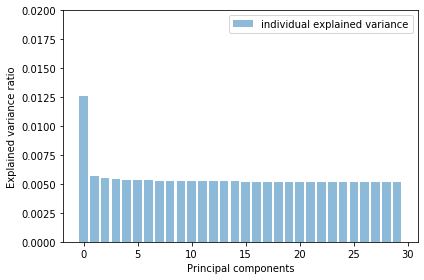

In [68]:
#plot explained variance 
plt.bar(range(pca.explained_variance_ratio_.shape[0]), pca.explained_variance_ratio_, alpha = 0.5, 
        align = 'center', label = 'individual explained variance')
plt.ylabel('Explained variance ratio')
plt.xlabel('Principal components')
plt.ylim(0, 0.02)
plt.legend(loc = 'best')
plt.tight_layout()